# Setup

## Installations

In [1]:
import torch, subprocess
print("CUDA:", torch.cuda.is_available())
!nvidia-smi --query-gpu=index,name,utilization.gpu,memory.used --format=csv


CUDA: False
/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install -q condacolab
import condacolab, os
condacolab.install()        # Colab will restart itself once this finishes


⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:07
🔁 Restarting kernel...


In [ ]:
!conda install -y pytorch==2.3.1 torchvision==0.18.1 torchaudio==2.3.1 pytorch-cuda=11.8 -c pytorch -c nvidia
!conda install -y lightning==2.3.3 -c conda-forge

!pip install opencv-python==4.10.0.84 timm==1.0.8 wandb==0.17.5 lovely-tensors==0.1.16 torch-fidelity==0.3.0 einops==0.8.0 dctorch==0.1.2 torch-ema==0.3
!pip install natten==0.17.1+torch230cu118 -f https://shi-labs.com/natten/wheels
!pip install nvidia-cuda-nvcc-cu11
!pip install basicsr==1.4.2
!pip install git+https://github.com/toshas/torch-fidelity.git
!pip install lpips==0.1.4
!pip install piq==0.8.0
!pip install huggingface_hub==0.24.5

Channels:
 - pytorch
 - nvidia
 - conda-forge
Platform: linux-64
Solving environment: - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pytorch-cuda=11.8
    - pytorch==2.3.1
    - torchaudio==2.3.1
    - torchvision==0.18.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       3_kmp_llvm           7 KB  conda-forge
    aom-3.5.0                  |       h27087fc_0         2.7 MB  conda-forge
    blas-2.116                 |              mkl          13 KB  conda-forge
    blas-devel-3.9.0           |   16_linux64_mkl          12 KB  conda-forge
    ca-certificates-2025.6.15  |       hbd8a1cb_0         148 KB  conda-forge
    certifi-2025.6.15          |     pyhd8ed1ab_0         152 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    cpython-3.11.13     

Looking in links: https://shi-labs.com/natten/wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.1/505.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 115.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 133.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 146.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 147.3 MB/s eta 0:00:00
  Created wheel for basicsr: filename=basicsr-1.4.2-py3-none-any.whl size=214820 sha256=f891db443475b17284f58cff4158cb3dbc197bb131406490ccb941f3637f7256
  Stored in directory: /root/.cache/pip/wheels/6d/a4/b3/9f888ba88efcae6dd4bbce69832363de9c4051142674f779fa
Successfully built basicsr
  Attempting uninstall: Pillow
    Found existing installation: Pi

## Patching files

In [ ]:
%%bash
# Find Basicsr’s install location → patch the bad import
FILE=$(python - <<'PY'
import importlib.metadata, pathlib, sys
dist = importlib.metadata.distribution("basicsr")
print(pathlib.Path(dist.locate_file("basicsr/data/degradations.py")))
PY
)
echo "Patching $FILE ..."
sed -i 's/from torchvision.transforms.functional_tensor import rgb_to_grayscale/from torchvision.transforms.functional import rgb_to_grayscale/' "$FILE"
# show the patched line for confirmation
grep -n "rgb_to_grayscale" -A0 -B1 "$FILE" | head


Patching /usr/local/lib/python3.11/site-packages/basicsr/data/degradations.py ...
7-from scipy.stats import multivariate_normal
8:from torchvision.transforms.functional import rgb_to_grayscale
--
630-    if cal_gray_noise:
631:        img_gray = rgb_to_grayscale(img, num_output_channels=1)


In [ ]:
import basicsr, torch
print("BasicSR:", basicsr.__version__)
print("Torch:", torch.__version__, "CUDA OK?", torch.cuda.is_available())


BasicSR: 1.4.2
Torch: 2.3.1 CUDA OK? True


## Connecting Drive to Colab

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os, glob, pathlib

# folders you want to inspect  (add/remove paths as needed)
folders = [
    "/content/drive/MyDrive/PMRF/data/cropped_faces/ffhq256",
    "/content/drive/MyDrive/PMRF/data/cropped_faces/ffhq512",
    "/content/drive/MyDrive/PMRF/data/celeba_512_validation",
    "/content/drive/MyDrive/PMRF/data/celeba_512_validation_lq",
    "/content/drive/MyDrive/PMRF/data/celeba_256_test",
    "/content/drive/MyDrive/PMRF/data/lfw-Test",
    "/content/drive/MyDrive/PMRF/outputs/celeba512_pmrf/restored_images",
    "/content/drive/MyDrive/PMRF/outputs/celeba512_pmrf/restored_images_posterior_mean",
    "/content/drive/MyDrive/PMRF/outputs/lfw_pmrf/restored_images",
    "/content/drive/MyDrive/PMRF/outputs/lfw_pmrf/restored_images_posterior_mean",
    "/content/drive/MyDrive/PMRF/data/Wider-Test"
]

img_ext = ("*.png", "*.jpg", "*.jpeg", "*.webp")  # extend if you have other formats

for folder in folders:
    folder = pathlib.Path(folder)
    if not folder.exists():
        print(f"{folder}  —  (not found)")
        continue

    # count all files matching the extensions, in this folder *and* sub-folders
    n_imgs = sum(len(glob.glob(str(folder / "**" / ext), recursive=True))
                 for ext in img_ext)
    print(f"{folder.relative_to('/content/drive/MyDrive/PMRF')}  →  {n_imgs:,} images")


data/cropped_faces/ffhq256  →  10,000 images
data/cropped_faces/ffhq512  →  10,000 images
data/celeba_512_validation  →  3,000 images
data/celeba_512_validation_lq  →  3,000 images
data/celeba_256_test  →  3,000 images
data/lfw-Test  →  1,711 images
outputs/celeba512_pmrf/restored_images  →  3,000 images
outputs/celeba512_pmrf/restored_images_posterior_mean  →  3,000 images
outputs/lfw_pmrf/restored_images  →  1,711 images
outputs/lfw_pmrf/restored_images_posterior_mean  →  1,711 images
data/Wider-Test  →  970 images


# Blind face image restoration (section 5.1 in the paper)

## Inference CelebA-Test

In [ ]:
%cd /content/drive/MyDrive/PMRF

!python inference.py \
  --ckpt_path ./checkpoints/blind_face_restoration_pmrf.ckpt \
  --lq_data_path ./data/celeba_512_validation_lq \
  --output_dir ./outputs/celeba512_pmrf \
  --batch_size 64 \
  --num_flow_steps 25

Streaming output truncated to the last 5000 lines.
 19% 9/47 [20:02<1:06:22, 104.79s/it]
  0% 0/64 [00:00<?, ?it/s]
  2% 1/64 [00:00<00:10,  5.74it/s]
  3% 2/64 [00:00<00:10,  5.65it/s]
  5% 3/64 [00:00<00:10,  5.71it/s]
  6% 4/64 [00:00<00:10,  5.72it/s]
  8% 5/64 [00:00<00:10,  5.72it/s]
  9% 6/64 [00:01<00:10,  5.72it/s]
 11% 7/64 [00:01<00:10,  5.61it/s]
 12% 8/64 [00:01<00:09,  5.73it/s]
 14% 9/64 [00:01<00:10,  5.48it/s]
 16% 10/64 [00:01<00:09,  5.45it/s]
 17% 11/64 [00:01<00:09,  5.47it/s]
 19% 12/64 [00:02<00:09,  5.42it/s]
 20% 13/64 [00:02<00:09,  5.55it/s]
 22% 14/64 [00:02<00:09,  5.52it/s]
 23% 15/64 [00:02<00:08,  5.57it/s]
 25% 16/64 [00:02<00:08,  5.65it/s]
 27% 17/64 [00:03<00:08,  5.83it/s]
 28% 18/64 [00:03<00:07,  6.03it/s]
 30% 19/64 [00:03<00:07,  5.71it/s]
 31% 20/64 [00:03<00:08,  5.41it/s]
 33% 21/64 [00:03<00:08,  5.02it/s]
 34% 22/64 [00:04<00:08,  4.93it/s]
 36% 23/64 [00:04<00:08,  4.92it/s]
 38% 24/64 [00:04<00:08,  4.83it/s]
 39% 25/64 [00:04<00:08,  4.8

## Evaluation CelebA-Test

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_blind.py \
  --parent_ffhq_512_path ../data/cropped_faces \
  --rec_path              ../outputs/celeba512_pmrf/restored_images \
  --gt_path               ../data/celeba_512_validation


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
1065: 00001064                 . 	NIQE: 3.553659
1066: 00001065                 . 	NIQE: 4.878478
1067: 00001066                 . 	NIQE: 3.518097
1068: 00001067                 . 	NIQE: 4.143029
1069: 00001068                 . 	NIQE: 4.821178
1070: 00001069                 . 	NIQE: 4.035539
1071: 00001070                 . 	NIQE: 4.172405
1072: 00001071                 . 	NIQE: 3.778237
1073: 00001072                 . 	NIQE: 4.393075
1074: 00001073                 . 	NIQE: 5.612849
1075: 00001074                 . 	NIQE: 3.722554
1076: 00001075                 . 	NIQE: 3.887272
1077: 00001076                 . 	NIQE: 3.175068
1078: 00001077                 . 	NIQE: 3.417008
1079: 00001078                 . 	NIQE: 3.739888
1080: 00001079                 . 	NIQE: 4.048024
1081: 00001080                 . 	NIQE: 4.038006
1082: 00001081                 . 	NIQE: 4.307222
1083: 00001082                 . 	NIQE: 3.867637
10

## Inference LFW-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF

!python inference.py \
  --ckpt_path ./checkpoints/blind_face_restoration_pmrf.ckpt \
  --lq_data_path ./data/lfw-Test \
  --output_dir ./outputs/lfw_pmrf \
  --batch_size 64 \
  --num_flow_steps 25

/content/drive/MyDrive/PMRF
/usr/local/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Compiled model
  0% 0/27 [00:00<?, ?it/s]
  0% 0/64 [00:00<?, ?it/s]
  2% 1/64 [00:00<00:12,  4.93it/s]
  3% 2/64 [00:00<00:12,  4.99it/s]
  5% 3/64 [00:00<00:11,  5.10it/s]
  6% 4/64 [00:00<00:11,  5.37it/s]
  8% 5/64 [00:00<00:10,  5.53it/s]
  9% 6/64 [00:01<00:10,  5.51it/s]
 11% 7/64 [00:01<00:10,  5.55it/s]
 12% 8/64 [00:01<00:10,  5.55it/s]
 14% 9/64 [00:01<00:09,  5.61it/s]
 16% 10/64 [00:01<00:09,  5.65it/s]
 17% 11/64 [00:02<00:09,  5.50it/s]
 19% 12/64 [00:02<00:09,  5.33it/s]
 20% 13/64 [00:02<00:09,  5.49it/s]
 22% 14/64 [00:02<00:09,  5.43it/s]
 23% 15/64 [00:02<00:09,  5.39it/s]
 25% 16/64 [00:02<00:08,  5.45it/s]
 27% 17/64 [00:03<00:08,  5.40it/s]
 28% 18/64 [00:03<00:08,  5.37it/s]
 30% 19/64 [0

## Evaluation LFW-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_blind.py \
  --parent_ffhq_512_path  ../data/cropped_faces \
  --rec_path              ../outputs/lfw_pmrf/restored_images \
  --mmse_rec_path         ../outputs/lfw_pmrf/restored_images_posterior_mean

/content/drive/MyDrive/PMRF/evaluation
  1: AJ_Lamas_0001_00         . 	NIQE: 4.020012
  2: Aaron_Guiel_0001_00      . 	NIQE: 4.105968
  3: Aaron_Tippin_0001_00     . 	NIQE: 4.166591
  4: Abba_Eban_0001_00        . 	NIQE: 4.098567
  5: Abdul_Majeed_Shobokshi_0001_00. 	NIQE: 5.255275
  6: Abdulaziz_Kamilov_0001_00. 	NIQE: 4.184654
  7: Abdullah_Gul_0001_00     . 	NIQE: 4.479506
  8: Abdullatif_Sener_0001_00 . 	NIQE: 4.400703
  9: Abel_Aguilar_0001_00     . 	NIQE: 3.713936
 10: Abid_Hamid_Mahmud_Al-Tikriti_0001_00. 	NIQE: 4.495390
 11: Adam_Ant_0001_00         . 	NIQE: 4.164734
 12: Adam_Kennedy_0001_00     . 	NIQE: 3.878646
 13: Adel_Al-Jubeir_0001_00   . 	NIQE: 3.811138
 14: Adrian_Annus_0001_00     . 	NIQE: 4.178656
 15: Adrian_Murrell_0001_00   . 	NIQE: 5.993655
 16: Adriana_Lima_0001_00     . 	NIQE: 3.384680
 17: Adriana_Perez_Navarro_0001_00. 	NIQE: 3.687151
 18: Adrien_Brody_0001_00     . 	NIQE: 4.869888
 19: Agbani_Darego_0001_00    . 	NIQE: 4.895612
 20: Agnelo_Queiroz_0001_00  

## Inference Wider-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF

!python inference.py \
  --ckpt_path ./checkpoints/blind_face_restoration_pmrf.ckpt \
  --lq_data_path ./data/Wider-Test \
  --output_dir ./outputs/wider_pmrf \
  --batch_size 32 \
  --num_flow_steps 25

/content/drive/MyDrive/PMRF
/usr/local/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Compiled model
  0% 0/31 [00:00<?, ?it/s]
  0% 0/32 [00:00<?, ?it/s]
  3% 1/32 [00:00<00:05,  5.34it/s]
  6% 2/32 [00:00<00:05,  5.56it/s]
  9% 3/32 [00:00<00:05,  5.72it/s]
 12% 4/32 [00:00<00:04,  5.96it/s]
 16% 5/32 [00:00<00:04,  6.07it/s]
 19% 6/32 [00:01<00:04,  6.17it/s]
 22% 7/32 [00:01<00:04,  6.06it/s]
 25% 8/32 [00:01<00:04,  5.93it/s]
 28% 9/32 [00:01<00:03,  5.80it/s]
 31% 10/32 [00:01<00:03,  5.95it/s]
 34% 11/32 [00:01<00:03,  5.90it/s]
 38% 12/32 [00:02<00:03,  5.89it/s]
 41% 13/32 [00:02<00:03,  5.89it/s]
 44% 14/32 [00:02<00:03,  5.80it/s]
 47% 15/32 [00:02<00:03,  5.66it/s]
 50% 16/32 [00:02<00:02,  5.59it/s]
 53% 17/32 [00:02<00:02,  5.62it/s]
 56% 18/32 [00:03<00:02,  5.71it/s]
 59% 19/32 [0

## Evaluation Wider-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_blind.py \
  --parent_ffhq_512_path  ../data/cropped_faces \
  --rec_path              ../outputs/wider_pmrf/restored_images \
  --mmse_rec_path         ../outputs/wider_pmrf/restored_images_posterior_mean

/content/drive/MyDrive/PMRF/evaluation
  1: 0000                     . 	NIQE: 4.179511
  2: 0001                     . 	NIQE: 3.998930
  3: 0002                     . 	NIQE: 4.202299
  4: 0003                     . 	NIQE: 3.344849
  5: 0004                     . 	NIQE: 3.220679
  6: 0005                     . 	NIQE: 4.184834
  7: 0006                     . 	NIQE: 4.382864
  8: 0007                     . 	NIQE: 4.376272
  9: 0008                     . 	NIQE: 5.099783
 10: 0009                     . 	NIQE: 3.463638
 11: 0010                     . 	NIQE: 3.413433
 12: 0011                     . 	NIQE: 3.617615
 13: 0012                     . 	NIQE: 3.526083
 14: 0013                     . 	NIQE: 5.165391
 15: 0014                     . 	NIQE: 4.771709
 16: 0015                     . 	NIQE: 4.430369
 17: 0016                     . 	NIQE: 4.473337
 18: 0017                     . 	NIQE: 4.041034
 19: 0018                     . 	NIQE: 3.659141
 20: 0019                     . 	NIQE: 4.055679
 

## Inference WebPhoto-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF

!python inference.py \
  --ckpt_path ./checkpoints/blind_face_restoration_pmrf.ckpt \
  --lq_data_path ./data/WebPhoto-Test/WebPhoto-Test \
  --output_dir ./outputs/webphoto_pmrf \
  --batch_size 32 \
  --num_flow_steps 25

/content/drive/MyDrive/PMRF
/usr/local/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Compiled model
  0% 0/13 [00:00<?, ?it/s]
  0% 0/32 [00:00<?, ?it/s]
  3% 1/32 [00:00<00:05,  5.75it/s]
  6% 2/32 [00:00<00:05,  5.78it/s]
  9% 3/32 [00:00<00:04,  5.92it/s]
 12% 4/32 [00:00<00:04,  5.67it/s]
 16% 5/32 [00:00<00:04,  5.90it/s]
 19% 6/32 [00:01<00:04,  5.90it/s]
 22% 7/32 [00:01<00:04,  5.95it/s]
 25% 8/32 [00:01<00:03,  6.04it/s]
 28% 9/32 [00:01<00:03,  6.09it/s]
 31% 10/32 [00:01<00:03,  5.99it/s]
 34% 11/32 [00:01<00:03,  6.06it/s]
 38% 12/32 [00:02<00:03,  6.15it/s]
 41% 13/32 [00:02<00:03,  6.13it/s]
 44% 14/32 [00:02<00:02,  6.17it/s]
 47% 15/32 [00:02<00:02,  5.90it/s]
 50% 16/32 [00:02<00:02,  5.73it/s]
 53% 17/32 [00:02<00:02,  5.76it/s]
 56% 18/32 [00:03<00:02,  5.66it/s]
 59% 19/32 [0

## Evaluation WebPhoto-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_blind.py \
  --parent_ffhq_512_path  ../data/cropped_faces \
  --rec_path              ../outputs/webphoto_pmrf/restored_images \
  --mmse_rec_path         ../outputs/webphoto_pmrf/restored_images_posterior_mean

/content/drive/MyDrive/PMRF/evaluation
  1: 00000_00                 . 	NIQE: 4.268629
  2: 00000_01                 . 	NIQE: 4.307056
  3: 00002_00                 . 	NIQE: 5.857227
  4: 00003_00                 . 	NIQE: 5.457624
  5: 00003_01                 . 	NIQE: 6.047562
  6: 00004_00                 . 	NIQE: 4.419884
  7: 00005_00                 . 	NIQE: 3.711291
  8: 00005_01                 . 	NIQE: 4.194355
  9: 00006_00                 . 	NIQE: 3.993483
 10: 00006_01                 . 	NIQE: 4.268809
 11: 00006_02                 . 	NIQE: 4.463877
 12: 00006_03                 . 	NIQE: 3.295953
 13: 00006_04                 . 	NIQE: 3.317153
 14: 00007_00                 . 	NIQE: 3.593352
 15: 00008_00                 . 	NIQE: 5.606262
 16: 00008_01                 . 	NIQE: 6.167936
 17: 00009_00                 . 	NIQE: 4.215878
 18: 00009_01                 . 	NIQE: 5.432212
 19: 00010_00                 . 	NIQE: 4.239854
 20: 00010_01                 . 	NIQE: 4.444565
 

## Inference CelebAdult-Test (Real-World Data)

In [ ]:
# from your project root
%cd /content/drive/MyDrive/PMRF

!python inference.py \
  --ckpt_path ./checkpoints/blind_face_restoration_pmrf.ckpt \
  --lq_data_path ./data/CelebChild-Test/Adult \
  --output_dir   ./outputs/celeb_adult_pmrf \
  --batch_size   32 \
  --num_flow_steps 25

/content/drive/MyDrive/PMRF
/usr/local/lib/python3.11/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
Compiled model
  0% 0/6 [00:00<?, ?it/s]
  0% 0/32 [00:00<?, ?it/s]
  3% 1/32 [00:00<00:04,  7.09it/s]
  6% 2/32 [00:00<00:04,  6.56it/s]
  9% 3/32 [00:00<00:04,  6.16it/s]
 12% 4/32 [00:00<00:04,  6.53it/s]
 16% 5/32 [00:00<00:04,  6.58it/s]
 19% 6/32 [00:00<00:04,  6.13it/s]
 22% 7/32 [00:01<00:04,  5.62it/s]
 25% 8/32 [00:01<00:04,  5.57it/s]
 28% 9/32 [00:01<00:04,  5.64it/s]
 31% 10/32 [00:01<00:03,  5.72it/s]
 34% 11/32 [00:01<00:03,  5.66it/s]
 38% 12/32 [00:02<00:03,  5.68it/s]
 41% 13/32 [00:02<00:03,  5.57it/s]
 44% 14/32 [00:02<00:03,  5.82it/s]
 47% 15/32 [00:02<00:02,  5.71it/s]
 50% 16/32 [00:02<00:02,  5.76it/s]
 53% 17/32 [00:02<00:02,  5.68it/s]
 56% 18/32 [00:03<00:02,  5.61it/s]
 59% 19/32 [00

## Evaluation CelebAdult-Test (Real-World Data)

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_blind.py \
  --parent_ffhq_512_path  ../data/cropped_faces \
  --rec_path              ../outputs/celeb_adult_pmrf/restored_images \
  --mmse_rec_path         ../outputs/celeb_adult_pmrf/restored_images_posterior_mean

/content/drive/MyDrive/PMRF/evaluation
  1: 000_Adele_01             . 	NIQE: 3.448411
  2: 001_Ryan_Gosling_01      . 	NIQE: 4.254029
  3: 002_Barack_Obama_01      . 	NIQE: 4.087815
  4: 003_Angelina_Jolie_01    . 	NIQE: 3.483158
  5: 004_Leonardo_DiCaprio_01 . 	NIQE: 3.962285
  6: 005_Chloe_Grace_Moretz_01. 	NIQE: 4.643272
  7: 006_Neil_Patrick_Harris_01. 	NIQE: 3.329953
  8: 007_Benedict_Cumberbatch_01. 	NIQE: 3.294070
  9: 008_George_Clooney_01    . 	NIQE: 3.490208
 10: 009_Freddie_Mercury_01   . 	NIQE: 3.669157
 11: 010_Marilyn_Monroe_01    . 	NIQE: 3.698854
 12: 011_Jennifer_Aniston_01  . 	NIQE: 4.549404
 13: 012_Jackie_Chan_01       . 	NIQE: 3.137436
 14: 013_Elijah_Wood_01       . 	NIQE: 4.101383
 15: 014_Brooke_Shields_01    . 	NIQE: 3.807621
 16: 015_John_Travolta_01     . 	NIQE: 3.340300
 17: 016_Keira_Knightley_01   . 	NIQE: 3.895663
 18: 017_Amy_Winehouse_01     . 	NIQE: 3.210874
 19: 018_Russell_Crowe_01     . 	NIQE: 3.351356
 20: 019_Anne_Hathaway_01     . 	NIQE: 5.08168

## Visualization of results

In [ ]:
import matplotlib as mpl
import os

cache_dir = mpl.get_cachedir()
print("Matplotlib cache dir:", cache_dir)


Matplotlib cache dir: /root/.cache/matplotlib


In [ ]:
import shutil

tex_cache = os.path.join(cache_dir, 'tex.cache')
shutil.rmtree(tex_cache, ignore_errors=True)
print("TeX cache deleted.")


TeX cache deleted.


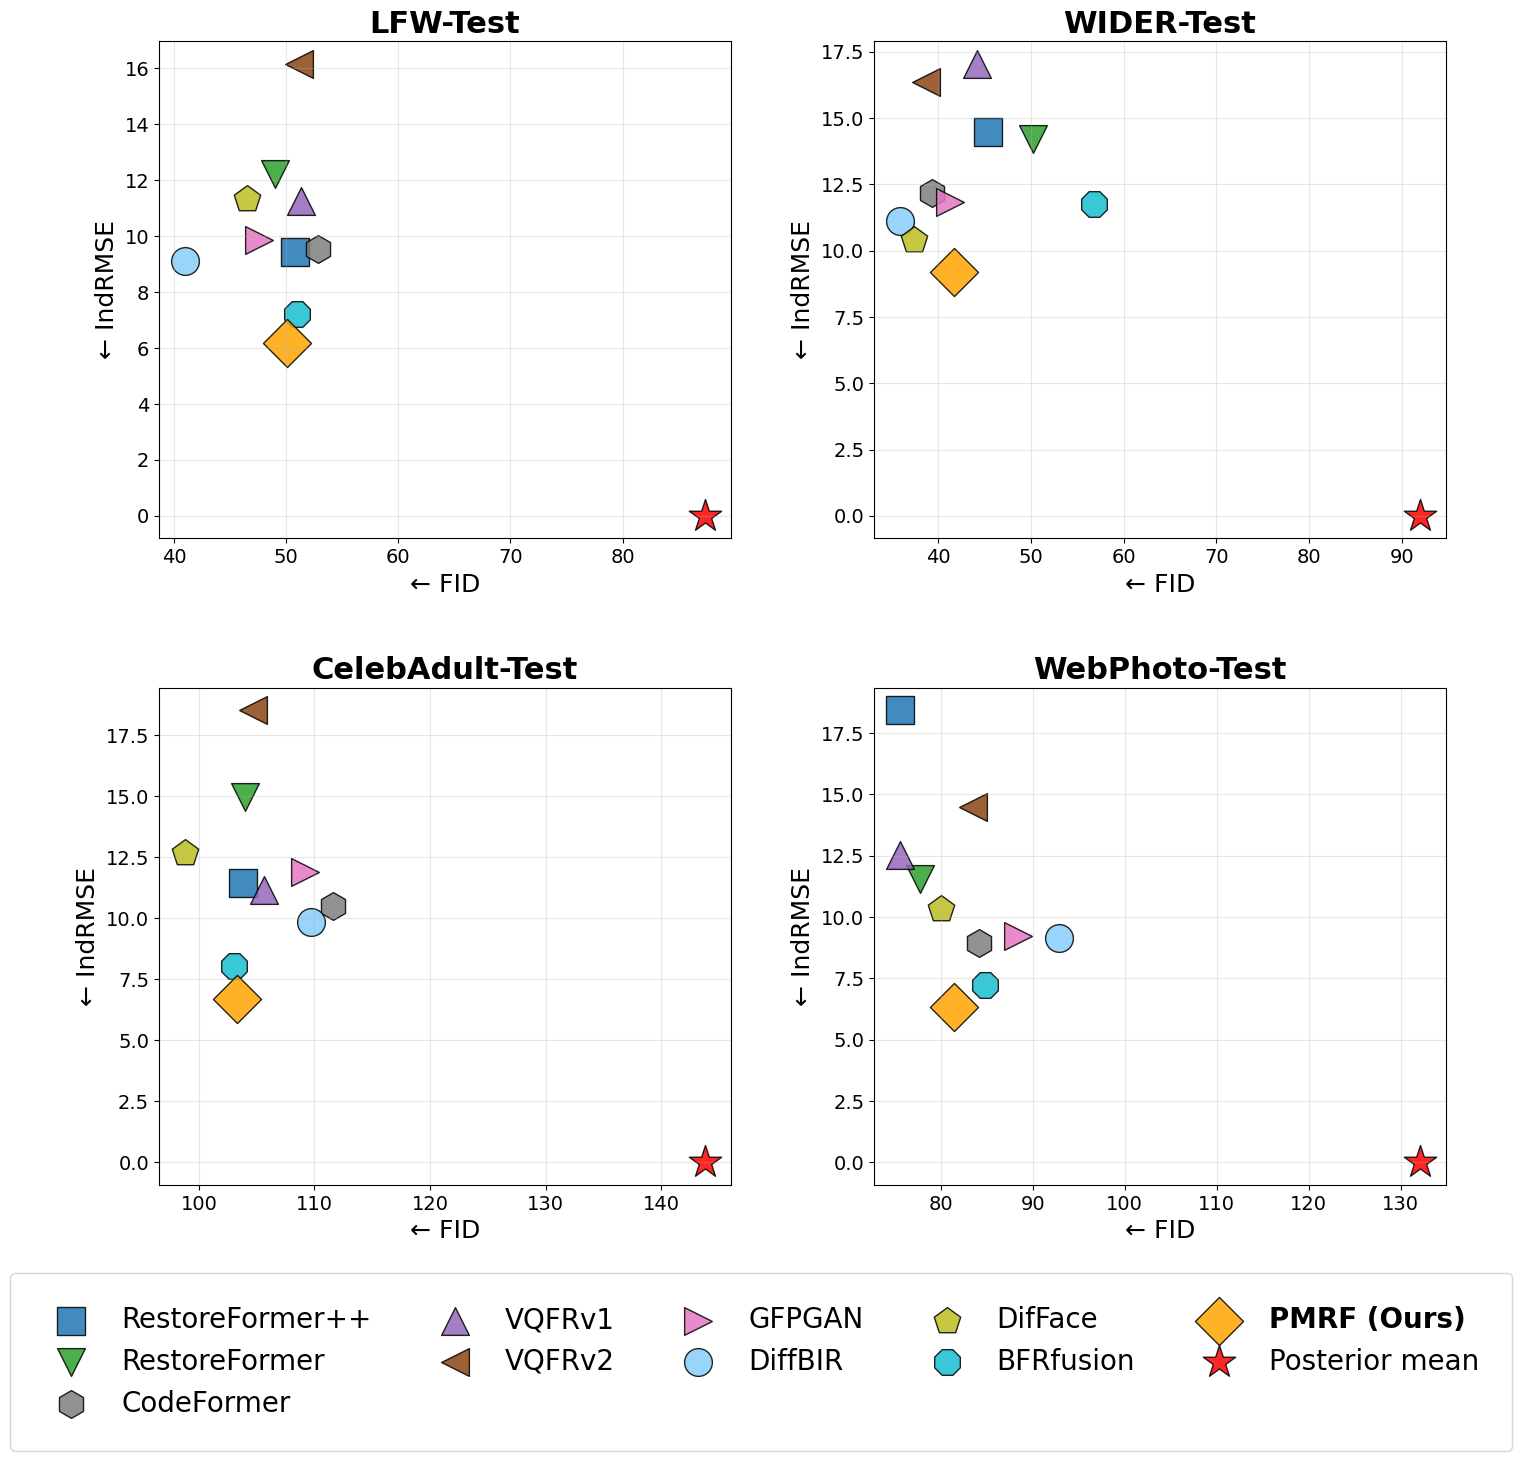

In [ ]:
import matplotlib.pyplot as plt

# Baseline stats per dataset (from Tables 7-10)
def plot_comparison_with_baselines():
  baseline_stats = {
      'LFW-Test': {
          'RestoreFormer++': {'FID': 50.80, 'IndRMSE': 9.429, 'marker':'s','color':'tab:blue'},
          'RestoreFormer':   {'FID': 49.04, 'IndRMSE': 12.21,'marker':'v','color':'tab:green'},
          'CodeFormer':      {'FID': 52.82, 'IndRMSE': 9.534, 'marker':'h','color':'tab:gray'},
          'VQFRv1':          {'FID': 51.31, 'IndRMSE': 11.26,'marker':'^','color':'tab:purple'},
          'VQFRv2':          {'FID': 51.16, 'IndRMSE': 16.15,'marker':'<','color':'saddlebrown'},
          'GFPGAN':          {'FID': 47.59, 'IndRMSE': 9.842,'marker':'>','color':'tab:pink'},
          'DiffBIR':         {'FID': 40.97, 'IndRMSE': 9.105,'marker':'o','color':'lightskyblue'},
          'DifFace':         {'FID': 46.48, 'IndRMSE': 11.33,'marker':'p','color':'tab:olive'},
          'BFRfusion':       {'FID': 50.93, 'IndRMSE': 7.210,'marker':'8','color':'tab:cyan'},
      },
      'WIDER-Test': {
          'RestoreFormer++':{'FID': 45.41, 'IndRMSE':14.466,'marker':'s','color':'tab:blue'},
          'RestoreFormer':  {'FID': 50.23, 'IndRMSE':14.200,'marker':'v','color':'tab:green'},
          'CodeFormer':     {'FID': 39.27, 'IndRMSE':12.185,'marker':'h','color':'tab:gray'},
          'VQFRv1':         {'FID': 44.21, 'IndRMSE':17.042,'marker':'^','color':'tab:purple'},
          'VQFRv2':         {'FID': 38.70, 'IndRMSE':16.368,'marker':'<','color':'saddlebrown'},
          'GFPGAN':         {'FID': 41.28, 'IndRMSE':11.840,'marker':'>','color':'tab:pink'},
          'DiffBIR':        {'FID': 35.87, 'IndRMSE':11.106,'marker':'o','color':'lightskyblue'},
          'DifFace':        {'FID': 37.38, 'IndRMSE':10.418,'marker':'p','color':'tab:olive'},
          'BFRfusion':      {'FID': 56.82, 'IndRMSE':11.759,'marker':'8','color':'tab:cyan'},
      },
      'CelebAdult-Test': {
          'RestoreFormer++':{'FID':103.81,'IndRMSE':11.43,'marker':'s','color':'tab:blue'},
          'RestoreFormer':  {'FID':103.96,'IndRMSE':14.97,'marker':'v','color':'tab:green'},
          'CodeFormer':     {'FID':111.62,'IndRMSE':10.49,'marker':'h','color':'tab:gray'},
          'VQFRv1':         {'FID':105.59,'IndRMSE':11.14,'marker':'^','color':'tab:purple'},
          'VQFRv2':         {'FID':104.72,'IndRMSE':18.51,'marker':'<','color':'saddlebrown'},
          'GFPGAN':         {'FID':109.19,'IndRMSE':11.90,'marker':'>','color':'tab:pink'},
          'DiffBIR':        {'FID':109.74,'IndRMSE':9.853,'marker':'o','color':'lightskyblue'},
          'DifFace':        {'FID': 98.78,'IndRMSE':12.66,'marker':'p','color':'tab:olive'},
          'BFRfusion':      {'FID':103.06,'IndRMSE':8.037,'marker':'8','color':'tab:cyan'},
      },
      'WebPhoto-Test': {
          'RestoreFormer++':{'FID':75.60,'IndRMSE':18.43,'marker':'s','color':'tab:blue'},
          'RestoreFormer':  {'FID':77.80,'IndRMSE':11.55,'marker':'v','color':'tab:green'},
          'CodeFormer':     {'FID':84.17,'IndRMSE':8.952,'marker':'h','color':'tab:gray'},
          'VQFRv1':         {'FID':75.57,'IndRMSE':12.53,'marker':'^','color':'tab:purple'},
          'VQFRv2':         {'FID':83.52,'IndRMSE':14.48,'marker':'<','color':'saddlebrown'},
          'GFPGAN':         {'FID':88.43,'IndRMSE':9.240,'marker':'>','color':'tab:pink'},
          'DiffBIR':        {'FID':92.82,'IndRMSE':9.152,'marker':'o','color':'lightskyblue'},
          'DifFace':        {'FID':80.05,'IndRMSE':10.31,'marker':'p','color':'tab:olive'},
          'BFRfusion':      {'FID':84.83,'IndRMSE':7.222,'marker':'8','color':'tab:cyan'},
      },
  }

  # Your own results
  results = {
      'LFW-Test':      {'PMRF': {'FID': 50.059, 'IndRMSE': 6.168}, 'Posterior': {'FID': 87.34, 'IndRMSE': 0.0}},
      'WIDER-Test':    {'PMRF': {'FID': 41.685,  'IndRMSE': 9.175}, 'Posterior': {'FID': 91.96,  'IndRMSE': 0.0}},
      'CelebAdult-Test': {'PMRF': {'FID':103.281, 'IndRMSE': 6.697}, 'Posterior': {'FID':143.80, 'IndRMSE': 0.0}},
      'WebPhoto-Test': {'PMRF': {'FID': 81.466,  'IndRMSE': 6.322}, 'Posterior': {'FID':132.1, 'IndRMSE': 0.0}},
  }

  # Prepare 2x2 subplot layout
  fig, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=False, sharey=False)

  # Flatten axes for easy iteration
  axes = axes.flatten()

  # Plot
  for i, ds in enumerate(baseline_stats.keys()):
      ax = axes[i]

      # plot baselines
      for name, stats in baseline_stats[ds].items():
          ax.scatter(stats['FID'], stats['IndRMSE'],
                    marker=stats['marker'], s=400,
                    color=stats['color'], edgecolor='black', alpha=0.85, label=name)

      # plot PMRF and Posterior
      ax.scatter(results[ds]['PMRF']['FID'], results[ds]['PMRF']['IndRMSE'],
            marker='D', s=600, color='orange',
            edgecolor='black', alpha=0.85, label='PMRF (Ours)')
      ax.scatter(results[ds]['Posterior']['FID'], results[ds]['Posterior']['IndRMSE'],
                marker='*', s=600, alpha=0.85, color='red', edgecolor='black', label='Posterior mean')

      ax.set_title(ds, fontsize=22, fontweight='bold')
      ax.set_xlabel('← FID', fontsize=18)
      ax.set_ylabel('← IndRMSE', fontsize=18)
      ax.tick_params(labelsize=14)
      ax.grid(alpha=0.3)

  # Create unified legend
  handles, labels = axes[-1].get_legend_handles_labels()
  legend = fig.legend(handles, labels,
            loc='lower center', ncol=5, fontsize=20,
            frameon=True, fancybox=True,
            bbox_to_anchor=(0.5, -0.05),borderpad=1.2)

  for text in legend.get_texts():
      if text.get_text() == 'PMRF (Ours)':
          text.set_fontweight('bold')


  # Adjust layout
  plt.tight_layout()
  plt.subplots_adjust(bottom=0.15, wspace=0.25, hspace=0.3)  # Space for legend
  plt.show()

plot_comparison_with_baselines()


# Controlled experiments (section 5.2 in the paper)

## Checks

## Resizing and creating new CelebA-Test data set to 256x256

In [ ]:
%cd /content/drive/MyDrive/PMRF

from PIL import Image
import os

src_dir = 'data/celeba_512_validation'
dst_dir = 'data/celeba_256_test'
os.makedirs(dst_dir, exist_ok=True)

for fname in os.listdir(src_dir):
    if not fname.lower().endswith(('.png','.jpg','.jpeg')):
        continue
    img = Image.open(os.path.join(src_dir, fname))
    img256 = img.resize((256, 256), resample=Image.BICUBIC)
    img256.save(os.path.join(dst_dir, fname))


/content/drive/MyDrive/PMRF


In [ ]:
%cd /content/drive/MyDrive/PMRF

from PIL import Image
print(Image.open('data/celeba_256_test/00000000.png').size)  # should print (256, 256)


/content/drive/MyDrive/PMRF
(256, 256)


## Inference

In [ ]:
import torch, platform, subprocess, json, os, datetime as dt

print("· Python     :", platform.python_version())
print("· Torch      :", torch.__version__)
print("· CUDA avail :", torch.cuda.is_available())
if torch.cuda.is_available():
    idx  = torch.cuda.current_device()
    print("· Device     :", idx, torch.cuda.get_device_name(idx))
    print("· VRAM alloc :", f"{torch.cuda.memory_allocated()/1e6:.0f} MB")


· Python     : 3.11.13
· Torch      : 2.3.1
· CUDA avail : True
· Device     : 0 NVIDIA A100-SXM4-40GB
· VRAM alloc : 0 MB


In [ ]:
import torch, time
x = torch.randn(8_192, 8_192, device='cuda')  # allocate 256 MB on GPU
print("VRAM now :", torch.cuda.memory_allocated()/1e6, "MB")
y = x @ x.t()                                 # one big matmul
torch.cuda.synchronize()
print("Done, util spike should have appeared.")
del x, y; torch.cuda.empty_cache()


VRAM now : 268.435456 MB
Done, util spike should have appeared.


In [ ]:
%cd /content/drive/MyDrive/PMRF
!bash test.sh


/content/drive/MyDrive/PMRF
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/1
----------------------------------------------------------------------------------------------------
distributed_backend=nccl
All distributed processes registered. Starting with 1 processes
----------------------------------------------------------------------------------------------------

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Testing DataLoader 0: 100% 47/47 [06:42<00:00,  8.57s/it]


## Evaluation

### colorization_gaussian_noise_025

#### MMSE Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/colorization_gaussian_noise_025/mmse/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:48, 14.54s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Naive Flow Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/colorization_gaussian_noise_025/naive_flow/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:48, 14.51s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### PMRF Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/colorization_gaussian_noise_025/pmrf/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:38, 14.10s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Posterior conditioned on y

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/colorization_gaussian_noise_025/posterior_conditioned_on_y/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:43, 14.29s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
24it [05:43, 14.29s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-featu

#### Posterior conditioned on mmse

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/colorization_gaussian_noise_025/posterior_conditioned_on_mmse/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:50, 14.60s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

### gaussian_noise_035

#### MMSE Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/gaussian_noise_035/mmse/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
Downloading: "https://github.com/photosynthesis-team/photosynthesis.metrics/releases/download/v0.4.0/lpips_weights.pt" to /root/.cache/torch/hub/checkpoints/lpips_weights.pt
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
24it [06:08, 15.37s/it]
Creating feature ex

#### Naive Flow Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/gaussian_noise_035/naive_flow/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:12, 13.01s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### PMRF Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/gaussian_noise_035/pmrf/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:15, 13.13s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### Posterior conditioned on y

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/gaussian_noise_035/posterior_conditioned_on_y/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:10, 12.96s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Posterior conditioned on mmse

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/gaussian_noise_035/posterior_conditioned_on_mmse/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:18, 13.26s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

### random_inpainting_gaussian_noise_01

#### MMSE Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/random_inpainting_gaussian_noise_01/mmse/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [04:25, 11.05s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Naive Flow Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/random_inpainting_gaussian_noise_01/naive_flow/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:30, 13.76s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### PMRF Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/random_inpainting_gaussian_noise_01/pmrf/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:29, 13.74s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Posterior conditioned on y

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/random_inpainting_gaussian_noise_01/posterior_conditioned_on_y/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:33, 13.88s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### Posterior conditioned on mmse

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/random_inpainting_gaussian_noise_01/posterior_conditioned_on_mmse/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:34, 13.94s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

### sr_bicubic_x8_gaussian_noise_005

#### MMSE Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/sr_bicubic_x8_gaussian_noise_005/mmse/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:35, 14.00s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### Naive Flow Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/sr_bicubic_x8_gaussian_noise_005/naive_flow/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:35, 13.96s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### PMRF Results

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/sr_bicubic_x8_gaussian_noise_005/pmrf/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test


/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:39, 14.14s/it]
Creating feature extractor "inception-v3-compat" with features ['2048', 'logits_unbiased']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.p

#### Posterior conditioned on y

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_y/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:44, 14.36s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

#### Posterior conditioned on mmse

In [ ]:
%cd /content/drive/MyDrive/PMRF/evaluation

!python compute_metrics_controlled_experiments.py \
  --parent_ffhq_256_path ../data/cropped_faces \
  --rec_path              ../controlled_experiments_results/num_flow_steps_20/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_mmse/num_flow_steps=20/xhat \
  --gt_path               ../data/celeba_256_test



/content/drive/MyDrive/PMRF/evaluation
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
24it [05:29, 13.72s/it]
Creating feature extractor "inception-v3-compat" with features ['logits_unbiased', '2048']
Extracting features from input1
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-logits_unbiased.pt
Loading cached /root/.cache/torch/fidelity_cache/ffhq256-inception-v3-compat-features-2048.p

## Visualization of Results

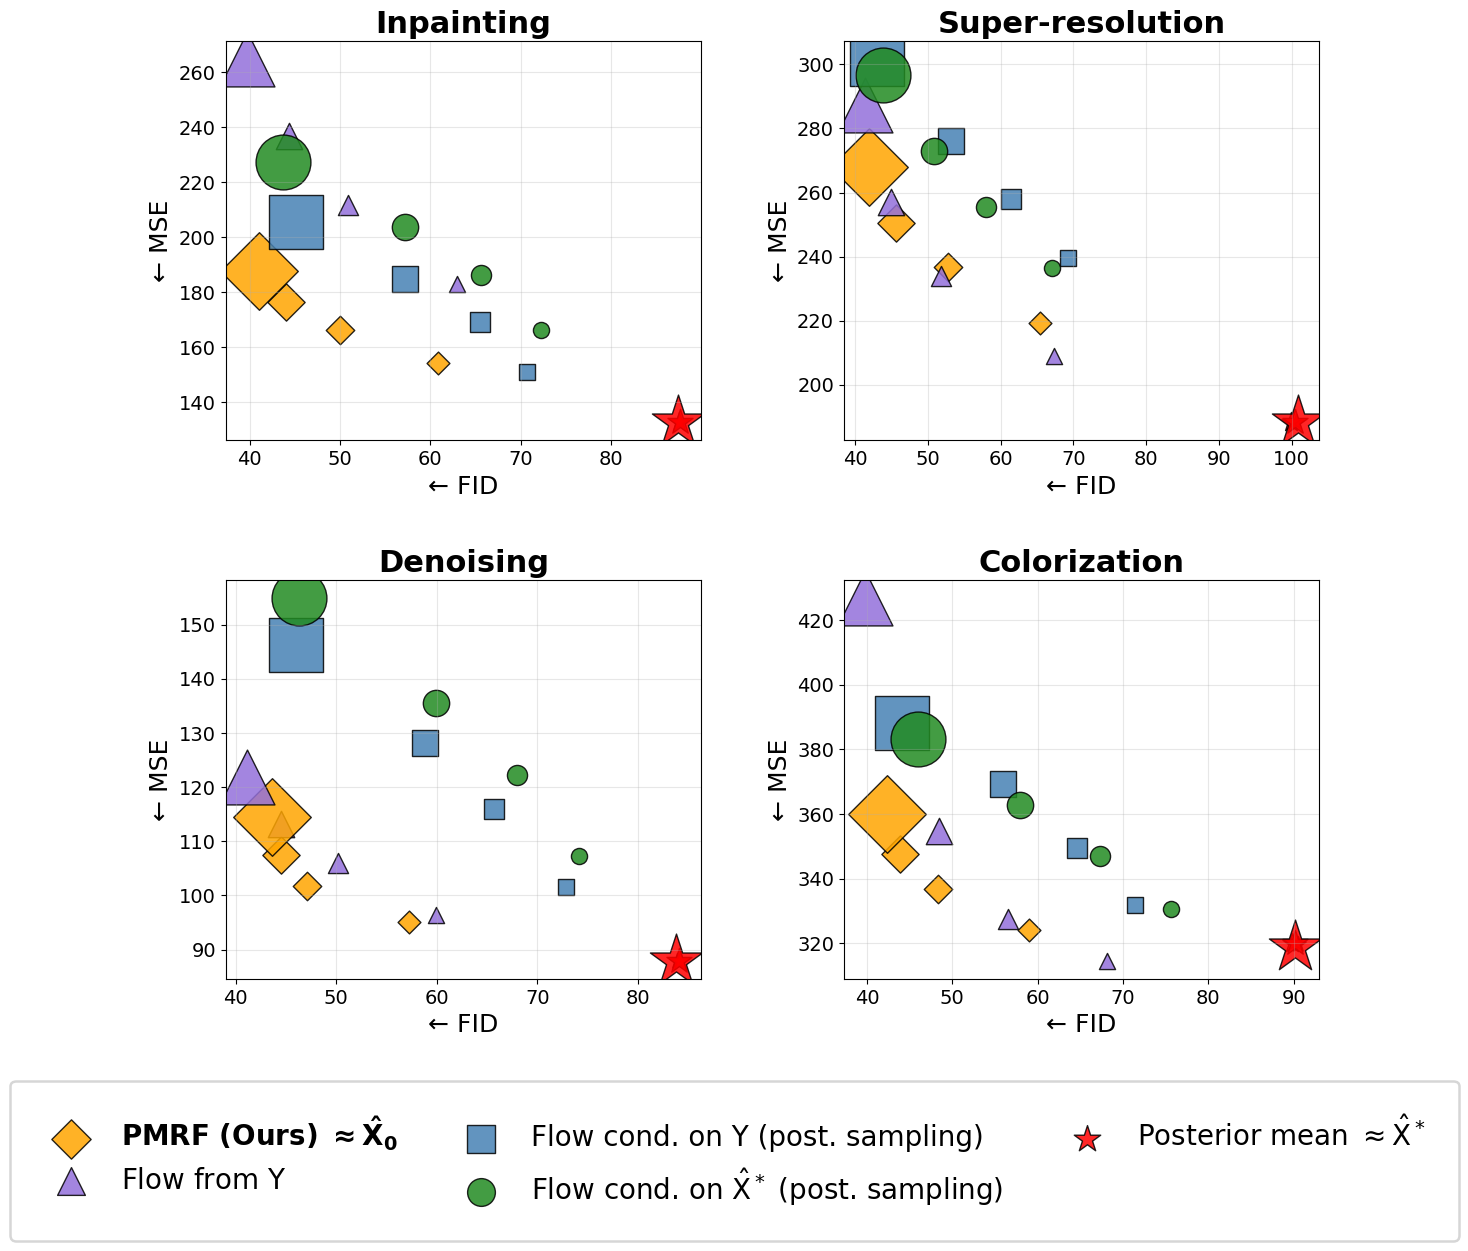

In [ ]:
import math
import matplotlib.pyplot as plt
from collections import OrderedDict

def plot_taskwise_k_variation():
  # ─── 1) Your results for K=5 and K=10 ────────────────────────────────────────
  results = {
      'Inpainting': {
          5: {
              'pmrf'                    : (60.897028951350705, 154.45333862304688),
              'naive_flow'              : (62.90912736871593 , 182.8358154296875),
              'posterior_conditioned_on_y'   : (70.71857464861463 , 151.1521759033203),
              'posterior_conditioned_on_mmse': (72.2682685950688  , 166.37928771972656),
              'mmse'                    : (87.56078256337281 , 133.0171356201172),
          },
          10:{
              'pmrf'                    : (49.959215753197725, 166.30311584472656),
              'naive_flow'              : (50.83841167755298 , 211.69801330566406),
              'posterior_conditioned_on_y'   : (65.47851607802494 , 169.30653381347656),
              'posterior_conditioned_on_mmse': (65.58326398352744 , 186.10006713867188),
              'mmse'                    : (87.54551674421882 , 133.0352020263672),
          },
          20: {
              'pmrf'                       : (44.01888862063629 , 176.3866424560547),
              'naive_flow'                 : (44.32692242688603 , 236.7946014404297),
              'posterior_conditioned_on_y' : (57.23879903477285 , 184.92864990234375),
              'posterior_conditioned_on_mmse': (57.23941803251125 , 203.5423126220703),
              'mmse'                       : (87.58245674197934 , 132.82688903808594),
          },
          100: {
              'pmrf'                       : (41.060269145621476, 187.7526092529297),
              'naive_flow'                 : (39.74127673857009 , 264.6390686035156),
              'posterior_conditioned_on_y' : (45.15798402522586 , 205.43914794921875),
              'posterior_conditioned_on_mmse': (43.72385534177687 , 227.32801818847656),
              'mmse'                       : (87.42382765155665 , 132.9518280029297),
          },
      },
      'Super-resolution': {
          5: {
              'pmrf'                    : (65.44924261475339 , 219.38966369628906),
              'naive_flow'              : (67.27952553248699 , 208.8721466064453),
              'posterior_conditioned_on_y'   : (69.30303015502511, 239.5287322998047),
              'posterior_conditioned_on_mmse': (67.07001657700232, 236.54258728027344),
              'mmse'                    : (100.55283770864585,188.4752960205078),
          },
          10:{
              'pmrf'                    : (52.785424262740776, 236.59677124023438),
              'naive_flow'              : (51.824271901078646, 234.02157592773438),
              'posterior_conditioned_on_y'   : (61.44870522081965 , 258.0864562988281),
              'posterior_conditioned_on_mmse': (58.000800159981054,255.48574829101562),
              'mmse'                    : (99.87633233738393 ,188.34768676757812),
          },
          20: {
              'pmrf'                       : (45.6424031559373, 250.43980407714844),
              'naive_flow'                 : (45.00214007871875, 256.9446105957031),
              'posterior_conditioned_on_y' : (53.129478920514316, 276.077880859375),
              'posterior_conditioned_on_mmse': (50.81728305280177 , 272.941650390625),
              'mmse'                       : (100.48644000741834, 188.39894104003906),
          },
          100: {
              'pmrf'                       : (41.928343199047674, 267.98663330078125),
              'naive_flow'                 : (41.439317723134764, 287.4717102050781),
              'posterior_conditioned_on_y' : (43.034855200606785, 301.5735168457031),
              'posterior_conditioned_on_mmse': (43.85051875508577 , 296.8307800292969),
              'mmse'                       : (100.80454152046462, 188.3335418701172),
          },
      },
      'Denoising': {
          5: {
              'pmrf'                    : (57.26917234341187 ,  95.17860412597656),
              'naive_flow'              : (59.95772299199996 ,  96.3966064453125),
              'posterior_conditioned_on_y'   : (72.81605253759781, 101.632080078125),
              'posterior_conditioned_on_mmse': (74.17118873234261,107.31572723388672),
              'mmse'                    : (83.90543519617142 ,  87.93732452392578),
          },
          10:{
              'pmrf'                    : (47.132690260876245,101.71717834472656),
              'naive_flow'              : (50.215772204353016,106.01441192626953),
              'posterior_conditioned_on_y'   : (65.65855018808739 ,115.9446792602539),
              'posterior_conditioned_on_mmse': (68.0340354474767  ,122.18679809570312),
              'mmse'                    : (84.15931319652952 , 87.9671859741211),
          },
          20: {
              'pmrf'                       : (44.50591099071414 , 107.43919372558594),
              'naive_flow'                 : (44.48671219894101 , 113.27307891845703),
              'posterior_conditioned_on_y' : (58.863617369878284, 128.17979431152344),
              'posterior_conditioned_on_mmse': (59.964672037589025, 135.49026489257812),
              'mmse'                       : (84.14275847938563 ,  87.93411254882812),
          },
          100: {
              'pmrf'                       : (43.57415765282195 , 114.51339721679688),
              'naive_flow'                 : (41.14610934273861 , 121.875      ),
              'posterior_conditioned_on_y' : (45.970392936887606, 146.3134307861328 ),
              'posterior_conditioned_on_mmse': (46.292394633347385, 154.91217041015625),
              'mmse'                       : (83.79616813242282 ,  87.97919464111328),
          },
      },
      'Colorization': {
          5: {
              'pmrf'                    : (59.00425855723046 , 324.1086730957031),
              'naive_flow'              : (68.10518268099969 , 314.555419921875),
              'posterior_conditioned_on_y'   : (71.36351598147871, 331.6667175292969),
              'posterior_conditioned_on_mmse': (75.67709057526378,330.6722412109375),
              'mmse'                    : (90.45560214844065 , 319.61346435546875),
          },
          10:{
              'pmrf'                    : (48.280889812494024,336.8588562011719),
              'naive_flow'              : (56.51396855191592 ,327.49017333984375),
              'posterior_conditioned_on_y'   : (64.6487757460693  ,349.5781555175781),
              'posterior_conditioned_on_mmse': (67.30322169060369,347.010986328125),
              'mmse'                    : (89.78229973151431 ,320.1524353027344),
          },
          20: {
              'pmrf'                       : (43.84343851382141 , 347.57281494140625),
              'naive_flow'                 : (48.39635932136491 , 354.7991638183594),
              'posterior_conditioned_on_y' : (55.9734654789321  , 369.2362976074219),
              'posterior_conditioned_on_mmse': (57.94368982049258 , 362.68670654296875),
              'mmse'                       : (90.1995189950855  , 320.0015563964844),
          },
          100: {
              'pmrf'                       : (42.33814359482528 , 360.0075378417969),
              'naive_flow'                 : (39.824651917110316, 426.8180236816406),
              'posterior_conditioned_on_y' : (44.084596174433614, 388.0299987792969),
              'posterior_conditioned_on_mmse': (46.00203605183373 , 383.0316162109375),
              'mmse'                       : (90.14040370619085 , 318.9187316894531),
          },
      },
  }

  # ─── 2) Style & legend entries ────────────────────────────────────────────────
  style = {
    'pmrf': {
        'marker': 'D',
        'c': 'orange',
        'label': r'$\bf{PMRF}$ (Ours) $\approx \hat{X}_0$'
    },
    'posterior_conditioned_on_mmse': {
        'marker': 'o',
        'c': 'forestgreen',
        'label': r'Flow cond. on $\hat{X}^*$ (post. sampling)'
    },
    'posterior_conditioned_on_y': {
        'marker': 's',
        'c': 'steelblue',
        'label': r'Flow cond. on Y (post. sampling)'
    },
    'naive_flow': {
        'marker': '^',
        'c': 'mediumpurple',
        'label': r'Flow from $Y$'
    },
    'mmse': {
        'marker': '*',
        'c': 'red',
        'label': r'Posterior mean $\approx \hat{X}^*$'
    },
  }

  # Marker size scales with K
  size_for = lambda K: 60 + 15*K

  # 2x2 layout
  fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False, sharey=False)
  axes = axes.flatten()

  for i, (task, by_K) in enumerate(results.items()):
      ax = axes[i]
      for K, methods in sorted(by_K.items()):
          for m, (fid, mse) in methods.items():
              st = style[m]
              ax.scatter(
                  fid, mse,
                  s=size_for(K),
                  marker=st['marker'],
                  c=st['c'],
                  edgecolor='black',
                  alpha=0.85,
                  label=st['label'] if (task == list(results)[0] and K == 5) else None
              )

      ax.set_title(task, fontsize=22, fontweight='bold')
      ax.set_xlabel('← FID', fontsize=18)
      ax.set_ylabel('← MSE', fontsize=18)
      ax.tick_params(labelsize=14)
      ax.grid(alpha=0.3)

  # Handle different point sizes in legend
  handler_map = {
      type(plt.scatter([], [], s=400)): HandlerPathCollection(sizes=[400])
  }

  # Collect all handles and labels
  handles, labels = [], []
  for ax in axes:
      h, l = ax.get_legend_handles_labels()
      handles.extend(h)
      labels.extend(l)

  # Remove duplicates while preserving order
  by_label = OrderedDict(zip(labels, handles))

  legend = fig.legend(
      by_label.values(), by_label.keys(),
      loc='lower center',
      bbox_to_anchor=(0.5, -0.05),
      ncol=3,
      fontsize=20,
      frameon=True,
      fancybox=True,
      borderpad=1.2,
      handler_map=handler_map
  )

  # Style legend box
  legend.get_frame().set_facecolor('white')
  legend.get_frame().set_alpha(0.8)
  legend.get_frame().set_linewidth(1.8)

  # Bold the PMRF label manually (already rendered via mathtext)
  for text in legend.get_texts():
      if "PMRF" in text.get_text():
          text.set_fontweight('bold')

  # Adjust layout
  plt.tight_layout()
  plt.subplots_adjust(bottom=0.18, wspace=0.3, hspace=0.35)
  plt.show()

plot_taskwise_k_variation()

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings

# ─── 1) Corrected 11 folders ───────────────────────────────────────────────────
roots = [
    ("Ground-truth", Path("/content/drive/MyDrive/PMRF/data/celeba_256_test")),
    ("Degraded",    Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/pmrf/y")),
    ("Posterior Mean",   Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/mmse/xhat")),
    ("PMRF (Ours)",        Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/pmrf/num_flow_steps=5/xhat")),
    ("PMRF (Ours)",        Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_100/sr_bicubic_x8_gaussian_noise_005/pmrf/num_flow_steps=100/xhat")),
    ("Flow cond. on Y",   Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_y/num_flow_steps=5/xhat")),
    ("Flow cond. on Y",   Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_100/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_y/num_flow_steps=100/xhat")),
    ("Flow cond. on X̂",  Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_mmse/num_flow_steps=5/xhat")),
    ("Flow cond. on X̂",  Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_100/sr_bicubic_x8_gaussian_noise_005/posterior_conditioned_on_mmse/num_flow_steps=100/xhat")),
    ("Flow from Y", Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_5/sr_bicubic_x8_gaussian_noise_005/naive_flow/num_flow_steps=5/xhat")),
    ("Flow from Y", Path("/content/drive/MyDrive/PMRF/controlled_experiments_results/num_flow_steps_100/sr_bicubic_x8_gaussian_noise_005/naive_flow/num_flow_steps=100/xhat")),
]

# ─── 2) helper to open any extension ───────────────────────────────────────────
def open_img(root: Path, idx: int):
    matches = list(root.glob(f"{idx:08d}.*"))
    if not matches:
        raise FileNotFoundError(f"No file for idx {idx} in {root.name}")
    return Image.open(matches[0]).convert("RGB")

# ─── 3) pick your 7 columns ────────────────────────────────────────────────────
indices = [   1,  500, 1000, 1500, 2000, 2952, 2989,  2999 ]  # 8 indices



# ─── 4) Grid: 3 initial rows + (sep + 2 rows)×4 = 15 total ────────────────────
# make the image‐rows a little shorter and sep‐rows a little taller
height_ratios = [0.9,0.9,0.9,0.3, 0.9,0.9, 0.3, 0.9,0.9, 0.3, 0.9,0.9, 0.3, 0.9,0.9]

# wspace=0 forces columns to butt right up against each other
fig = plt.figure(figsize=(16,24))
gs  = gridspec.GridSpec(15, len(indices),
    height_ratios=height_ratios,
    wspace=0, hspace=0.02)


# ─── 5) automatic map from root‐index → GridSpec row ───────────────────────────
# rows 0,1,2 are the first three; then skip sep rows at 3,6,9,12
image_rows = [0,1,2, 4,5, 7,8, 10,11, 13,14]
method_to_row = {mi: image_rows[mi] for mi in range(len(roots))}

# ─── 6) draw images & ONE label per pair ──────────────────────────────────────

# create a dict so we can refer back to each axes
# … after fig, gs, method_to_row, etc …

# …[your imports, roots, open_img, indices, height_ratios, fig, gs, image_rows, method_to_row…]…

# 6) draw all your images exactly as before, but no set_ylabel anywhere
axes = {}
for mi, (label, root) in enumerate(roots):
    row = method_to_row[mi]
    for col, idx in enumerate(indices):
        ax = fig.add_subplot(gs[row, col])
        axes[(row, col)] = ax
        try:
            ax.imshow(open_img(root, idx))
        except FileNotFoundError:
            warnings.warn(f"Missing idx {idx} in {root.name}")
            ax.imshow(Image.new("RGB", (256,256), "white"))

        if col > 0:
            ax.axis("off")
        else:
            ax.set_xticks([]); ax.set_yticks([])
            for spine in ax.spines.values(): spine.set_visible(False)

# 7) dashed separators
for sep_row in [3,6,9,12]:
    sep_ax = fig.add_subplot(gs[sep_row, :])
    sep_ax.plot([0, len(indices)-1], [0.5, 0.5],
                linestyle='--', color='black')
    sep_ax.axis('off')

# 8) final layout adjust
fig.subplots_adjust(
    left   = 0.10,
    right  = 0.99,
    top    = 0.99,
    bottom = 0.01,
    wspace = 0.0,
    hspace = 0.02,
)

# 9) vertical labels for the first 3 rows
for mi in [0,1,2]:
    name = roots[mi][0]  # "Ground-truth", "Degraded", "Posterior"
    bbox = gs[mi,0].get_position(fig)
    ymid = (bbox.y0 + bbox.y1)/2
    fig.text(
        x=0.05, y=ymid,
        s=name,
        rotation=90,
        va="center", ha="center",
        fontsize=12
    )

# 10) vertical group labels for the 4 pairs
paired = [
    ("PMRF (Ours)",       4, 5),
    ("Flow cond. on Y",  7, 8),
    ("Flow cond. on X̂",10,11),
    ("Flow from Y",13,14),
]
for name, r0, r1 in paired:
    # fix the X̂ with LaTeX
    if "X" in name:
        name = r"Flow on $\hat X$*"
    bbox0 = gs[r0,0].get_position(fig)
    bbox1 = gs[r1,0].get_position(fig)
    ymid  = (bbox0.y0 + bbox1.y1)/2
    fig.text(
        x=0.05, y=ymid,
        s=name,
        rotation=90,
        va="center", ha="center",
        fontsize=12
    )
# 11) add the K‐value labels vertically next to each image‐row
k_rows = [
    (4,  "K=5"),  (5,  "K=100"),
    (7,  "K=5"),  (8,  "K=100"),
    (10, "K=5"),  (11, "K=100"),
    (13, "K=5"),  (14, "K=100"),
]

for row_i, txt in k_rows:
    # center of that row
    bbox = gs[row_i, 0].get_position(fig)
    ymid = (bbox.y0 + bbox.y1) / 2

    fig.text(
        x=0.08,       # nudge right of your group‐label
        y=ymid,
        s=txt,
        rotation=90,  # vertical text
        va="center",
        ha="center",
        fontsize=12,
    )


plt.show()


Output hidden; open in https://colab.research.google.com to view.

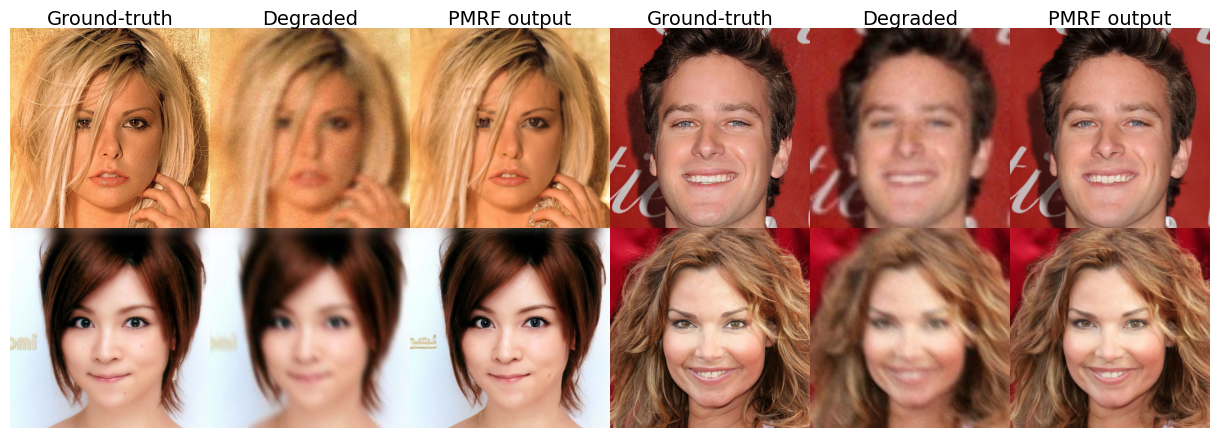

In [22]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

# 1) point these at your directories
root_gt    = Path("/content/drive/MyDrive/PMRF/data/celeba_512_validation")
root_deg   = Path("/content/drive/MyDrive/PMRF/data/celeba_512_validation_lq")
root_pmrf  = Path("/content/drive/MyDrive/PMRF/outputs/celeba512_pmrf/restored_images")

# 2) pick two example IDs (or more rows if you like)
sample_ids = [1, 5, 6, 12]   # e.g. image 00000012.png and 00000345.png

n_per_row     = 2    # how many samples to show per row
cols_per_trip = 3    # GT / Degraded / PMRF
n_rows        = 2
n_cols        = n_per_row * cols_per_trip
cell_size     = 2.0  # inches per image cell

# ─── 4) make figure ───────────────────────────────────────────────────────────
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols*cell_size, n_rows*cell_size),
    gridspec_kw=dict(wspace=0, hspace=0)
)

titles = ["Ground-truth", "Degraded", "PMRF output"]
roots  = [root_gt, root_deg, root_pmrf]

# ─── 5) plot ─────────────────────────────────────────────────────────────────
for row in range(n_rows):
    # which samples go in this row?
    row_samples = sample_ids[row*n_per_row:(row+1)*n_per_row]
    for i, idx in enumerate(row_samples):
        for col_in_trip, title in enumerate(titles):
            col = i*cols_per_trip + col_in_trip
            ax  = axes[row, col]
            img = Image.open(roots[col_in_trip] / f"{idx:08d}.png").convert("RGB")
            ax.imshow(img)
            ax.axis("off")
            # only on the top row, set column titles
            if row == 0:
                ax.set_title(title, pad=2, fontsize=14)

# ─── 6) zero‐margin final adjust ──────────────────────────────────────────────
fig.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.show()